# Enhanced QAOA Algorithm Comparison Experiments

This notebook provides enhanced visualization and execution for comparing:
- Adapt-QAOA: Adaptive mixer operators
- Standard-QAOA: Fixed X-gate mixers
- Adapt-QAOA with Noise: Depolarizing noise simulation

## Features:
- Import reusable functions from `run_experiments.py`
- Enhanced visualizations with English labels
- Real-time execution results display
- Comprehensive statistics and plots

In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

# Add parent directory to path for imports
sys.path.insert(0, os.path.dirname(os.path.abspath('.')))

# Import functions from run_experiments.py
from run_experiments import (
    load_graphs,
    save_csv,
    run_single_algorithm,
    run_all_algorithms_on_graph,
    _to_python_native,
    OUTPUT_DIR
)

# Import algorithm modules dynamically
main_adapt = None
main_standard = None
main_adapt_noise = None

try:
    from Main_Multilevel_qaoa import main_adapt, main_standard, main_adapt_noise
    print("✅ Successfully imported algorithm modules")
except ImportError as e:
    print(f"⚠️  Failed to import algorithm modules: {e}")

# Display configuration
print("\n" + "="*70)
print("Enhanced QAOA Comparison Experiments")
print("="*70)

✅ Successfully imported algorithm modules

Enhanced QAOA Comparison Experiments


In [2]:
# Configuration parameters
SEED = 10
NOISE_PROB = 0.05
RUN_ADAPT = True
RUN_STANDARD = True
RUN_ADAPT_NOISE = True

print(f"\n📊 Configuration:")
print(f"  Random Seed: {SEED}")
print(f"  Noise Probability: {NOISE_PROB}")
print(f"  Algorithms to run:")
if RUN_ADAPT:
    print(f"    ✓ Adapt-QAOA")
if RUN_STANDARD:
    print(f"    ✓ Standard-QAOA")
if RUN_ADAPT_NOISE:
    print(f"    ✓ Adapt-QAOA with Noise (p={NOISE_PROB})")


📊 Configuration:
  Random Seed: 10
  Noise Probability: 0.05
  Algorithms to run:
    ✓ Adapt-QAOA
    ✓ Standard-QAOA
    ✓ Adapt-QAOA with Noise (p=0.05)


In [3]:
# Load graph data
print("\n" + "="*70)
print("Step 1/4: Loading Graph Data")
print("="*70)

graphs = load_graphs(format_type='col')
# graphs = load_graphs(format_type='pkl')
if not graphs:
    print("⚠️  No graph data loaded, exiting...")
    raise SystemExit

print(f"✅ Successfully loaded {len(graphs)} graphs")

# Display graph information
graph_info = []
for i, graph in enumerate(graphs):
    graph_info.append({
        'index': i,
        'name': getattr(graph, 'file_name', f'graph_{i}'),
        'nodes': graph.number_of_nodes(),
        'edges': graph.number_of_edges(),
        'density': 2 * graph.number_of_edges() / (graph.number_of_nodes() * (graph.number_of_nodes() - 1)) if graph.number_of_nodes() > 1 else 0
    })

df_graph_info = pd.DataFrame(graph_info)
print("\n📊 Dataset Information:")
print(df_graph_info.to_string(index=False))


Step 1/4: Loading Graph Data
📂 扫描目录: d:\A Research\mindquantum\HQAOA_coloring\HAdaQAOA\Data\instances
   发现 1 个 .col 文件
✓ 强制加载 .col 格式（忽略 0 个 .pkl 文件）
从目录加载图数据: d:\A Research\mindquantum\HQAOA_coloring\HAdaQAOA\Data\instances
发现 1 个 .col 文件
  [1/1] myciel5.col (节点=47, 边=236)
✓ 成功加载 1 张图（格式: .col）
✅ Successfully loaded 1 graphs

📊 Dataset Information:
 index        name  nodes  edges  density
     0 myciel5.col     47    236 0.218316


In [ ]:
# Run experiments on all graphs
print("\n" + "="*70)
print("Step 2/4: Running Experiments")
print("="*70)

records = []
total_start_time = time.time()

# Directly call algorithm main functions and process results
if RUN_ADAPT and main_adapt is not None:
    print("\n" + "─"*70)
    print("Running Adapt-QAOA on all graphs...")
    print("─"*70)
    try:
        adapt_results = main_adapt(graphs, dataset='cache_dataset', graph_index=0, seed=SEED)
        print(f"✅ Adapt-QAOA completed: {len(adapt_results)} results")
    except Exception as e:
        print(f"❌ Adapt-QAOA failed: {e}")
        import traceback
        traceback.print_exc()
        adapt_results = []
else:
    adapt_results = []
    if RUN_ADAPT:
        print("⚠️ Adapt-QAOA not imported, skipping")

if RUN_STANDARD and main_standard is not None:
    print("\n" + "─"*70)
    print("Running Standard-QAOA on all graphs...")
    print("─"*70)
    try:
        std_results = main_standard(graphs, dataset='cache_dataset', graph_index=0, seed=SEED)
        print(f"✅ Standard-QAOA completed: {len(std_results)} results")
    except Exception as e:
        print(f"❌ Standard-QAOA failed: {e}")
        import traceback
        traceback.print_exc()
        std_results = []
else:
    std_results = []
    if RUN_STANDARD:
        print("⚠️ Standard-QAOA not imported, skipping")

if RUN_ADAPT_NOISE and main_adapt_noise is not None:
    print("\n" + "─"*70)
    print(f"Running Adapt-QAOA with Noise (p={NOISE_PROB}) on all graphs...")
    print("─"*70)
    try:
        noise_results = main_adapt_noise(graphs, dataset='cache_dataset', graph_index=0, seed=SEED, 
                                        depolarizing_prob=NOISE_PROB)
        print(f"✅ Adapt+Noise completed: {len(noise_results)} results")
    except Exception as e:
        print(f"❌ Adapt+Noise failed: {e}")
        import traceback
        traceback.print_exc()
        noise_results = []
else:
    noise_results = []
    if RUN_ADAPT_NOISE:
        print("⚠️ Adapt+Noise not imported, skipping")

# Integrate results into records format
for idx, graph in enumerate(graphs):
    print(f"\n{'─'*70}")
    print(f"Processing Graph {idx}/{len(graphs)-1}: {getattr(graph, 'file_name', f'graph_{idx}')}")
    print(f"{'─'*70}")
    
    record = {
        'graph_file': getattr(graph, 'file_name', f'graph_{idx}'),
        'graph_index': idx,
        # Adapt-QAOA results
        'adapt_colors': -1,
        'adapt_time': -1.0,
        'adapt_success': False,
        # Standard-QAOA results
        'std_colors': -1,
        'std_time': -1.0,
        'std_success': False,
        # Noise Adapt-QAOA results
        'adapt_colors_noise': -1,
        'adapt_time_noise': -1.0,
        'adapt_success_noise': False,
        'noise_prob_used': NOISE_PROB
    }
    
    # Extract Adapt-QAOA results
    if idx < len(adapt_results):
        res = adapt_results[idx]
        record['adapt_colors'] = res.get('unique_colors', -1)
        record['adapt_time'] = res.get('processing_time', -1.0)
        record['adapt_success'] = res.get('unique_colors', -1) > 0
    
    # Extract Standard-QAOA results
    if idx < len(std_results):
        res = std_results[idx]
        record['std_colors'] = res.get('unique_colors', -1)
        record['std_time'] = res.get('processing_time', -1.0)
        record['std_success'] = res.get('unique_colors', -1) > 0
    
    # Extract noise Adapt-QAOA results
    if idx < len(noise_results):
        res = noise_results[idx]
        record['adapt_colors_noise'] = res.get('unique_colors', -1)
        record['adapt_time_noise'] = res.get('processing_time', -1.0)
        record['adapt_success_noise'] = res.get('unique_colors', -1) > 0
    
    records.append(record)
    
    # Display results for this graph
    print(f"\n📊 Results for Graph {idx}:")
    if RUN_ADAPT:
        if record['adapt_success']:
            print(f"  Adapt-QAOA:   Colors={record['adapt_colors']}, Time={record['adapt_time']:.4f}s ✓")
        else:
            print(f"  Adapt-QAOA:   Failed ✗")
    
    if RUN_STANDARD:
        if record['std_success']:
            print(f"  Standard-QAOA: Colors={record['std_colors']}, Time={record['std_time']:.4f}s ✓")
        else:
            print(f"  Standard-QAOA: Failed ✗")
    
    if RUN_ADAPT_NOISE:
        if record['adapt_success_noise']:
            print(f"  Adapt+Noise:   Colors={record['adapt_colors_noise']}, Time={record['adapt_time_noise']:.4f}s ✓")
        else:
            print(f"  Adapt+Noise:   Failed ✗")

total_time = time.time() - total_start_time
print(f"\n✅ All experiments completed in {total_time:.2f}s")


Step 2/4: Running Experiments

──────────────────────────────────────────────────────────────────────
Running Adapt-QAOA on all graphs...
──────────────────────────────────────────────────────────────────────

adapt_qaoa | 图 1/1: myciel5
节点: 47 | 边: 236
Adapt-QAOA 划分完成：6 个子图


2026-01-30 18:15:35,999 - INFO - 
___________处理子图 1（普通图，节点数：8，边数：5）____________
2026-01-30 18:15:36,001 - INFO - 子图 1 签名: 79ec4842...
2026-01-30 18:15:36,002 - INFO - 子图判定为复杂图（边数=5，节点数=8，最大度=2），强制使用QAOA
2026-01-30 18:15:36,002 - INFO - 子图是普通图（最大度Δ=2），理论最小色数≤2
2026-01-30 18:15:36,003 - INFO - 复杂图强制使用QAOA，k值范围: 2 ~ 2
2026-01-30 18:15:36,004 - INFO - 
尝试k=2着色...


[DEBUG] k=2, n_qubits=1, num_edges=5, penalty=1000
[DEBUG] 理论最小值=0, 理论最大值=5000
k=2, 步骤 0/1000: 训练值 25.2
k=2, 步骤 20/1000: 训练值 13.3
k=2, 步骤 40/1000: 训练值 195.8
k=2, 步骤 60/1000: 训练值 398.3
k=2, 步骤 80/1000: 训练值 498.4
k=2, 步骤 100/1000: 训练值 499.9
k=2, 步骤 120/1000: 训练值 499.9
k=2 提前退出: 连续2步训练值变化≤0.1(499.9)


2026-01-30 18:15:36,961 - INFO - k=2 完成：收敛参数=499.9278，冲突数=0
2026-01-30 18:15:36,962 - INFO - 最优k值选择：k=2（收敛参数=499.9278，冲突数=0）
2026-01-30 18:15:36,963 - INFO - 第1次重试：冲突数=0
2026-01-30 18:15:36,964 - INFO - 第1次重试找到无冲突方案，提前退出
2026-01-30 18:15:36,965 - INFO - 子图 1 签名缓存已更新
2026-01-30 18:15:36,966 - INFO - 子图 1 完成：k=2，冲突数=0，状态=success
2026-01-30 18:15:36,967 - INFO - 
___________处理子图 2（普通图，节点数：9，边数：5）____________
2026-01-30 18:15:36,968 - INFO - 子图 2 签名: b8602d3b...
2026-01-30 18:15:36,968 - INFO - 子图判定为复杂图（边数=5，节点数=9，最大度=2），强制使用QAOA
2026-01-30 18:15:36,969 - INFO - 子图是普通图（最大度Δ=2），理论最小色数≤2
2026-01-30 18:15:36,970 - INFO - 复杂图强制使用QAOA，k值范围: 2 ~ 2
2026-01-30 18:15:36,971 - INFO - 
尝试k=2着色...


k=2 找到完美着色方案，冲突数=0
[DEBUG] k=2, n_qubits=1, num_edges=5, penalty=1000
[DEBUG] 理论最小值=0, 理论最大值=5000
k=2, 步骤 0/1000: 训练值 1.3
k=2, 步骤 20/1000: 训练值 79.1
k=2, 步骤 40/1000: 训练值 310.9
k=2, 步骤 60/1000: 训练值 556.0
k=2, 步骤 80/1000: 训练值 845.0
k=2, 步骤 100/1000: 训练值 939.7
k=2, 步骤 120/1000: 训练值 969.9
k=2, 步骤 140/1000: 训练值 985.4


2026-01-30 18:15:37,547 - INFO - k=2 完成：收敛参数=998.3608，冲突数=0
2026-01-30 18:15:37,548 - INFO - 最优k值选择：k=2（收敛参数=998.3608，冲突数=0）
2026-01-30 18:15:37,549 - INFO - 第1次重试：冲突数=0
2026-01-30 18:15:37,549 - INFO - 第1次重试找到无冲突方案，提前退出
2026-01-30 18:15:37,550 - INFO - 子图 2 签名缓存已更新
2026-01-30 18:15:37,551 - INFO - 子图 2 完成：k=2，冲突数=0，状态=success
2026-01-30 18:15:37,552 - INFO - 
___________处理子图 3（普通图，节点数：9，边数：7）____________
2026-01-30 18:15:37,553 - INFO - 子图 3 签名: a56621bc...
2026-01-30 18:15:37,554 - INFO - 子图判定为复杂图（边数=7，节点数=9，最大度=3），强制使用QAOA
2026-01-30 18:15:37,555 - INFO - 子图是普通图（最大度Δ=3），理论最小色数≤3
2026-01-30 18:15:37,556 - INFO - 复杂图强制使用QAOA，k值范围: 2 ~ 3
2026-01-30 18:15:37,557 - INFO - 
尝试k=2着色...


k=2, 步骤 160/1000: 训练值 992.7
k=2, 步骤 180/1000: 训练值 996.2
k=2, 步骤 200/1000: 训练值 998.0
k=2 提前退出: 连续2步训练值变化≤0.1(998.4)
k=2 找到完美着色方案，冲突数=0
[DEBUG] k=2, n_qubits=1, num_edges=7, penalty=1000
[DEBUG] 理论最小值=0, 理论最大值=7000
k=2, 步骤 0/1000: 训练值 13.5
k=2, 步骤 20/1000: 训练值 62.0
k=2, 步骤 40/1000: 训练值 86.2
k=2, 步骤 60/1000: 训练值 173.6
k=2, 步骤 80/1000: 训练值 319.6
k=2, 步骤 100/1000: 训练值 582.3
k=2, 步骤 120/1000: 训练值 763.2
k=2, 步骤 140/1000: 训练值 883.3
k=2, 步骤 160/1000: 训练值 938.0
k=2, 步骤 180/1000: 训练值 972.9
k=2, 步骤 200/1000: 训练值 987.0
k=2 提前退出: 连续2步训练值变化≤0.1(989.8)
k=2 找到完美着色方案，冲突数=0


2026-01-30 18:15:38,161 - INFO - k=2 完成：收敛参数=989.7845，冲突数=0
2026-01-30 18:15:38,162 - INFO - 已找到0冲突K值（2），终止后续K值训练
2026-01-30 18:15:38,163 - INFO - 最优k值选择：k=2（收敛参数=989.7845，冲突数=0）
2026-01-30 18:15:38,164 - INFO - 第1次重试：冲突数=0
2026-01-30 18:15:38,165 - INFO - 第1次重试找到无冲突方案，提前退出
2026-01-30 18:15:38,165 - INFO - 子图 3 签名缓存已更新
2026-01-30 18:15:38,166 - INFO - 子图 3 完成：k=2，冲突数=0，状态=success
2026-01-30 18:15:38,167 - INFO - 
___________处理子图 4（普通图，节点数：7，边数：8）____________
2026-01-30 18:15:38,168 - INFO - 子图 4 签名: 5acf64e0...
2026-01-30 18:15:38,169 - INFO - 子图判定为复杂图（边数=8，节点数=7，最大度=4），强制使用QAOA
2026-01-30 18:15:38,169 - INFO - 子图是普通图（最大度Δ=4），理论最小色数≤4
2026-01-30 18:15:38,170 - INFO - 复杂图强制使用QAOA，k值范围: 2 ~ 4
2026-01-30 18:15:38,171 - INFO - 
尝试k=2着色...


[DEBUG] k=2, n_qubits=1, num_edges=8, penalty=1000
[DEBUG] 理论最小值=0, 理论最大值=8000
k=2, 步骤 0/1000: 训练值 2.4
k=2, 步骤 20/1000: 训练值 158.4
k=2, 步骤 40/1000: 训练值 100.5
k=2, 步骤 60/1000: 训练值 17.2
k=2, 步骤 80/1000: 训练值 140.5
k=2, 步骤 100/1000: 训练值 372.2
k=2, 步骤 120/1000: 训练值 338.6
k=2, 步骤 140/1000: 训练值 53.6
k=2, 步骤 160/1000: 训练值 502.1
k=2, 步骤 180/1000: 训练值 533.6
k=2, 步骤 200/1000: 训练值 900.4
k=2, 步骤 220/1000: 训练值 896.9
k=2, 步骤 240/1000: 训练值 1042.6
k=2, 步骤 260/1000: 训练值 1164.8
k=2, 步骤 280/1000: 训练值 1203.6
k=2, 步骤 300/1000: 训练值 1213.6
k=2, 步骤 320/1000: 训练值 1231.6
k=2 提前退出: 连续2步训练值变化≤0.1(1240.1)


2026-01-30 18:15:39,473 - INFO - k=2 完成：收敛参数=1240.1102，冲突数=2
2026-01-30 18:15:39,474 - INFO - 
尝试k=3着色...


[DEBUG] k=3, n_qubits=2, num_edges=8, penalty=1000
[DEBUG] 理论最小值=0, 理论最大值=16000
k=3, 步骤 0/1000: 训练值 15.6
k=3, 步骤 20/1000: 训练值 36.8
k=3, 步骤 40/1000: 训练值 122.9
k=3, 步骤 60/1000: 训练值 52.7
k=3, 步骤 80/1000: 训练值 102.6
k=3, 步骤 100/1000: 训练值 48.8
k=3, 步骤 120/1000: 训练值 19.1
k=3, 步骤 140/1000: 训练值 161.5
k=3, 步骤 160/1000: 训练值 187.2
k=3, 步骤 180/1000: 训练值 149.9
k=3, 步骤 200/1000: 训练值 94.7
k=3, 步骤 220/1000: 训练值 33.0
k=3, 步骤 240/1000: 训练值 355.9
k=3, 步骤 260/1000: 训练值 349.6
k=3, 步骤 280/1000: 训练值 1.0
k=3, 步骤 300/1000: 训练值 336.3
k=3, 步骤 320/1000: 训练值 408.3
k=3, 步骤 340/1000: 训练值 877.5
k=3, 步骤 360/1000: 训练值 997.8
k=3, 步骤 380/1000: 训练值 1054.9
k=3, 步骤 400/1000: 训练值 1089.9
k=3, 步骤 420/1000: 训练值 1113.2
k=3, 步骤 440/1000: 训练值 1129.7
k=3, 步骤 460/1000: 训练值 1141.7
k=3, 步骤 480/1000: 训练值 1150.9
k=3, 步骤 500/1000: 训练值 1157.9
k=3, 步骤 520/1000: 训练值 1163.5
k=3, 步骤 540/1000: 训练值 1168.1
k=3, 步骤 560/1000: 训练值 1171.8
k=3, 步骤 580/1000: 训练值 1174.9
k=3, 步骤 600/1000: 训练值 1177.5
k=3, 步骤 620/1000: 训练值 1179.8
k=3, 步骤 640/1000: 训练值 1181

2026-01-30 18:16:17,212 - INFO - k=3 完成：收敛参数=1187.5593，冲突数=0
2026-01-30 18:16:17,213 - INFO - 已找到0冲突K值（3），终止后续K值训练
2026-01-30 18:16:17,213 - INFO - 最优k值选择：k=3（收敛参数=1187.5593，冲突数=0）
2026-01-30 18:16:17,214 - INFO - 第1次重试：冲突数=0
2026-01-30 18:16:17,215 - INFO - 第1次重试找到无冲突方案，提前退出
2026-01-30 18:16:17,216 - INFO - 子图 4 签名缓存已更新
2026-01-30 18:16:17,217 - INFO - 子图 4 完成：k=2，冲突数=0，状态=success
2026-01-30 18:16:17,218 - INFO - 
___________处理子图 5（普通图，节点数：5，边数：2）____________
2026-01-30 18:16:17,219 - INFO - 子图 5 签名: 51f06eec...
2026-01-30 18:16:17,219 - INFO - 子图为简单图（边数=2，节点数=5，最大度=2），允许快速路径
2026-01-30 18:16:17,220 - INFO - 子图是普通图（最大度Δ=2），理论最小色数≤2
2026-01-30 18:16:17,221 - INFO - 仅尝试 k=2（单 k 值快速路径）
2026-01-30 18:16:17,222 - INFO - 
尝试k=2着色...


k=3 提前退出: 连续2步训练值变化≤0.1(1187.6)
k=3 找到完美着色方案，冲突数=0
[DEBUG] k=2, n_qubits=1, num_edges=2, penalty=1000
[DEBUG] 理论最小值=0, 理论最大值=2000
k=2, 步骤 0/1000: 训练值 5.3
k=2, 步骤 20/1000: 训练值 75.5
k=2, 步骤 40/1000: 训练值 248.4
k=2, 步骤 60/1000: 训练值 369.8
k=2, 步骤 80/1000: 训练值 439.3
k=2, 步骤 100/1000: 训练值 465.0
k=2, 步骤 120/1000: 训练值 486.1
k=2 提前退出: 连续2步训练值变化≤0.1(489.5)
k=2 找到完美着色方案，冲突数=0


2026-01-30 18:16:17,506 - INFO - k=2 完成：收敛参数=489.4806，冲突数=0
2026-01-30 18:16:17,508 - INFO - 最优k值选择：k=2（收敛参数=489.4806，冲突数=0）
2026-01-30 18:16:17,509 - INFO - 第1次重试：冲突数=0
2026-01-30 18:16:17,509 - INFO - 第1次重试找到无冲突方案，提前退出
2026-01-30 18:16:17,510 - INFO - 子图 5 签名缓存已更新
2026-01-30 18:16:17,511 - INFO - 子图 5 完成：k=2，冲突数=0，状态=success
2026-01-30 18:16:17,512 - INFO - 
___________处理子图 6（普通图，节点数：8，边数：2）____________
2026-01-30 18:16:17,512 - INFO - 子图 6 签名: 6e2c6261...
2026-01-30 18:16:17,514 - INFO - 子图为简单图（边数=2，节点数=8，最大度=1），允许快速路径
2026-01-30 18:16:17,514 - INFO - 子图是普通图（最大度Δ=1），理论最小色数≤1
2026-01-30 18:16:17,515 - INFO - QAOA尝试k值范围: 2 ~ 2
2026-01-30 18:16:17,516 - INFO - 
尝试k=2着色...


[DEBUG] k=2, n_qubits=1, num_edges=2, penalty=1000
[DEBUG] 理论最小值=0, 理论最大值=2000
k=2, 步骤 0/1000: 训练值 1.1
k=2, 步骤 20/1000: 训练值 135.7
k=2, 步骤 40/1000: 训练值 303.6
k=2, 步骤 60/1000: 训练值 377.0
k=2, 步骤 80/1000: 训练值 460.4


2026-01-30 18:16:17,917 - INFO - k=2 完成：收敛参数=499.0117，冲突数=0
2026-01-30 18:16:17,918 - INFO - 最优k值选择：k=2（收敛参数=499.0117，冲突数=0）
2026-01-30 18:16:17,920 - INFO - 第1次重试：冲突数=0
2026-01-30 18:16:17,921 - INFO - 第1次重试找到无冲突方案，提前退出
2026-01-30 18:16:17,921 - INFO - 子图 6 签名缓存已更新
2026-01-30 18:16:17,922 - INFO - 子图 6 完成：k=2，冲突数=0，状态=success
2026-01-30 18:16:17,923 - INFO - cache_dataset,0,8,5,2,0,success
2026-01-30 18:16:17,924 - INFO - cache_dataset,1,9,5,2,0,success
2026-01-30 18:16:17,924 - INFO - cache_dataset,2,9,7,2,0,success
2026-01-30 18:16:17,925 - INFO - cache_dataset,3,7,8,2,0,success
2026-01-30 18:16:17,926 - INFO - cache_dataset,4,5,2,2,0,success
2026-01-30 18:16:17,926 - INFO - cache_dataset,5,8,2,2,0,success


k=2, 步骤 100/1000: 训练值 484.3
k=2, 步骤 120/1000: 训练值 494.1
k=2, 步骤 140/1000: 训练值 497.7
k=2 提前退出: 连续2步训练值变化≤0.1(499.0)
k=2 找到完美着色方案，冲突数=0
🎯 初始冲突 1/236  准确率 0.996

===== 迭代 1/10  冲突边 1 =====
⚙️  单冲突边，跳过子图重优化
✨ 冲突下降 0  准确率 1.000
✅ 冲突已归零，提前结束

===== 完成  冲突 0  准确率 1.000  颜色 6 =====

===== Adapt-QAOA Optimization Summary =====
Final Conflicts: 0 (Total Edges: 236)
Final Accuracy: 1.0000
Colors Used: 6
Best k Value: 2
Subgraph Reoptimization Count: 0
Subgraph coloring (renumbered) saved: d:\A Research\mindquantum\HQAOA_coloring\HAdaQAOA\HadaQAOA\subgraph_visualizations\adapt_qaoa_myciel5_subgraphs_renumbered.pdf
Subgraph coloring (original IDs) saved: d:\A Research\mindquantum\HQAOA_coloring\HAdaQAOA\HadaQAOA\subgraph_visualizations\adapt_qaoa_myciel5_subgraphs_original.pdf
Final coloring saved: d:\A Research\mindquantum\HQAOA_coloring\HAdaQAOA\HadaQAOA\graph_visualizations\adapt_myciel5_final_coloring_6.pdf
Adapt-QAOA Graph 1 completed, time: 44.4s

Adapt-QAOA All completed, total time: 44.6s
S

2026-01-30 18:16:20,545 - INFO - 
___________处理子图 1（普通图，节点数：8，边数：5）____________
2026-01-30 18:16:20,546 - INFO - 子图 1 签名: 79ec4842...
2026-01-30 18:16:20,548 - INFO - 子图判定为复杂图（边数=5，节点数=8，最大度=2），强制使用QAOA
2026-01-30 18:16:20,548 - INFO - 子图是普通图（最大度Δ=2），理论最小色数≤2
2026-01-30 18:16:20,549 - INFO - 复杂图强制使用QAOA，k值范围: 2 ~ 2
2026-01-30 18:16:20,550 - INFO - 
尝试k=2着色...


[DEBUG] k=2, n_qubits=1, num_edges=5, penalty=1000
[DEBUG] 理论最小值=0, 理论最大值=5000
k=2, 步骤 0/1000: 训练值 12.0
k=2, 步骤 20/1000: 训练值 199.4
k=2, 步骤 40/1000: 训练值 273.5
k=2, 步骤 60/1000: 训练值 153.9
k=2, 步骤 80/1000: 训练值 83.5
k=2, 步骤 100/1000: 训练值 401.9
k=2, 步骤 120/1000: 训练值 609.6
k=2, 步骤 140/1000: 训练值 674.7
k=2, 步骤 160/1000: 训练值 1138.6
k=2, 步骤 180/1000: 训练值 1235.7
k=2, 步骤 200/1000: 训练值 1297.0
k=2, 步骤 220/1000: 训练值 1326.9
k=2, 步骤 240/1000: 训练值 1343.1
k=2, 步骤 260/1000: 训练值 1352.4
k=2, 步骤 280/1000: 训练值 1357.8
k=2, 步骤 300/1000: 训练值 1361.2
k=2, 步骤 320/1000: 训练值 1363.3
k=2, 步骤 340/1000: 训练值 1364.6
k=2 提前退出: 连续2步训练值变化≤0.1(1364.8)


2026-01-30 18:16:21,636 - INFO - k=2 完成：收敛参数=1364.8，冲突数=0
2026-01-30 18:16:21,637 - INFO - 最优k值选择：k=2（收敛参数=1364.8401，冲突数=0）
2026-01-30 18:16:21,637 - INFO - 第1次重试：冲突数=0
2026-01-30 18:16:21,638 - INFO - 第1次重试找到无冲突方案，提前退出
2026-01-30 18:16:21,639 - INFO - 子图 1 签名缓存已更新
2026-01-30 18:16:21,639 - INFO - 子图 1 完成：k=2，冲突数=0，状态=success
2026-01-30 18:16:21,641 - INFO - 
___________处理子图 2（普通图，节点数：9，边数：5）____________
2026-01-30 18:16:21,642 - INFO - 子图 2 签名: b8602d3b...
2026-01-30 18:16:21,642 - INFO - 子图判定为复杂图（边数=5，节点数=9，最大度=2），强制使用QAOA
2026-01-30 18:16:21,643 - INFO - 子图是普通图（最大度Δ=2），理论最小色数≤2
2026-01-30 18:16:21,644 - INFO - 复杂图强制使用QAOA，k值范围: 2 ~ 2
2026-01-30 18:16:21,644 - INFO - 
尝试k=2着色...


k=2 找到完美着色方案，冲突数=0
[DEBUG] k=2, n_qubits=1, num_edges=5, penalty=1000
[DEBUG] 理论最小值=0, 理论最大值=5000
k=2, 步骤 0/1000: 训练值 2.8
k=2, 步骤 20/1000: 训练值 7.4
k=2, 步骤 40/1000: 训练值 15.8
k=2, 步骤 60/1000: 训练值 32.3
k=2, 步骤 80/1000: 训练值 21.0
k=2, 步骤 100/1000: 训练值 7.4
k=2, 步骤 120/1000: 训练值 256.7
k=2, 步骤 140/1000: 训练值 692.5
k=2, 步骤 160/1000: 训练值 999.0
k=2, 步骤 180/1000: 训练值 1292.7
k=2, 步骤 200/1000: 训练值 1432.9
k=2, 步骤 220/1000: 训练值 1565.5
k=2, 步骤 240/1000: 训练值 1630.3
k=2, 步骤 260/1000: 训练值 1668.4
k=2, 步骤 280/1000: 训练值 1692.2
k=2, 步骤 300/1000: 训练值 1707.5
k=2, 步骤 320/1000: 训练值 1717.4
k=2, 步骤 340/1000: 训练值 1724.1
k=2, 步骤 360/1000: 训练值 1728.7
k=2, 步骤 380/1000: 训练值 1731.9
k=2, 步骤 400/1000: 训练值 1734.2
k=2, 步骤 420/1000: 训练值 1735.9
k=2, 步骤 440/1000: 训练值 1737.1
k=2 提前退出: 连续2步训练值变化≤0.1(1737.3)


2026-01-30 18:16:22,724 - INFO - k=2 完成：收敛参数=1737.3，冲突数=0
2026-01-30 18:16:22,724 - INFO - 最优k值选择：k=2（收敛参数=1737.3293，冲突数=0）
2026-01-30 18:16:22,726 - INFO - 第1次重试：冲突数=0
2026-01-30 18:16:22,726 - INFO - 第1次重试找到无冲突方案，提前退出
2026-01-30 18:16:22,726 - INFO - 子图 2 签名缓存已更新
2026-01-30 18:16:22,727 - INFO - 子图 2 完成：k=2，冲突数=0，状态=success
2026-01-30 18:16:22,728 - INFO - 
___________处理子图 3（普通图，节点数：9，边数：7）____________
2026-01-30 18:16:22,730 - INFO - 子图 3 签名: a56621bc...
2026-01-30 18:16:22,731 - INFO - 子图判定为复杂图（边数=7，节点数=9，最大度=3），强制使用QAOA
2026-01-30 18:16:22,731 - INFO - 子图是普通图（最大度Δ=3），理论最小色数≤3
2026-01-30 18:16:22,732 - INFO - 复杂图强制使用QAOA，k值范围: 2 ~ 3
2026-01-30 18:16:22,733 - INFO - 
尝试k=2着色...


k=2 找到完美着色方案，冲突数=0
[DEBUG] k=2, n_qubits=1, num_edges=7, penalty=1000
[DEBUG] 理论最小值=0, 理论最大值=7000
k=2, 步骤 0/1000: 训练值 34.6
k=2, 步骤 20/1000: 训练值 17.9
k=2, 步骤 40/1000: 训练值 20.9
k=2, 步骤 60/1000: 训练值 27.1
k=2, 步骤 80/1000: 训练值 91.1
k=2, 步骤 100/1000: 训练值 86.3
k=2, 步骤 120/1000: 训练值 457.5
k=2, 步骤 140/1000: 训练值 275.4
k=2, 步骤 160/1000: 训练值 581.4
k=2, 步骤 180/1000: 训练值 263.4
k=2, 步骤 200/1000: 训练值 739.2
k=2, 步骤 220/1000: 训练值 1004.3
k=2, 步骤 240/1000: 训练值 1074.2
k=2, 步骤 260/1000: 训练值 1322.4
k=2, 步骤 280/1000: 训练值 1454.8
k=2, 步骤 300/1000: 训练值 1525.7
k=2, 步骤 320/1000: 训练值 1576.2
k=2, 步骤 340/1000: 训练值 1612.2
k=2, 步骤 360/1000: 训练值 1638.5
k=2, 步骤 380/1000: 训练值 1657.9
k=2, 步骤 400/1000: 训练值 1672.5
k=2, 步骤 420/1000: 训练值 1683.6
k=2, 步骤 440/1000: 训练值 1692.3
k=2, 步骤 460/1000: 训练值 1699.1
k=2, 步骤 480/1000: 训练值 1704.4
k=2, 步骤 500/1000: 训练值 1708.8
k=2, 步骤 520/1000: 训练值 1712.3
k=2, 步骤 540/1000: 训练值 1715.2
k=2, 步骤 560/1000: 训练值 1717.6
k=2, 步骤 580/1000: 训练值 1719.5
k=2, 步骤 600/1000: 训练值 1721.2
k=2, 步骤 620/1000: 训练值 1722

2026-01-30 18:16:24,549 - INFO - k=2 完成：收敛参数=1725.0，冲突数=1
2026-01-30 18:16:24,550 - INFO - 
尝试k=3着色...


[DEBUG] k=3, n_qubits=2, num_edges=7, penalty=1000
[DEBUG] 理论最小值=0, 理论最大值=14000
k=3, 步骤 0/1000: 训练值 10.5
k=3, 步骤 20/1000: 训练值 296.0
k=3, 步骤 40/1000: 训练值 25.5
k=3, 步骤 60/1000: 训练值 574.4
k=3, 步骤 80/1000: 训练值 409.7
k=3, 步骤 100/1000: 训练值 431.2
k=3, 步骤 120/1000: 训练值 339.1
k=3, 步骤 140/1000: 训练值 461.9
k=3, 步骤 160/1000: 训练值 289.4
k=3, 步骤 180/1000: 训练值 895.7
k=3, 步骤 200/1000: 训练值 1586.8
k=3, 步骤 220/1000: 训练值 1647.1
k=3, 步骤 240/1000: 训练值 2484.7
k=3, 步骤 260/1000: 训练值 2772.3
k=3, 步骤 280/1000: 训练值 2968.3
k=3, 步骤 300/1000: 训练值 3094.8
k=3, 步骤 320/1000: 训练值 3184.6
k=3, 步骤 340/1000: 训练值 3248.9
k=3, 步骤 360/1000: 训练值 3295.9
k=3, 步骤 380/1000: 训练值 3330.8
k=3, 步骤 400/1000: 训练值 3357.1
k=3, 步骤 420/1000: 训练值 3377.2
k=3, 步骤 440/1000: 训练值 3392.8
k=3, 步骤 460/1000: 训练值 3405.1
k=3, 步骤 480/1000: 训练值 3414.9
k=3, 步骤 500/1000: 训练值 3422.7
k=3, 步骤 520/1000: 训练值 3429.1
k=3, 步骤 540/1000: 训练值 3434.4
k=3, 步骤 560/1000: 训练值 3438.7
k=3, 步骤 580/1000: 训练值 3442.4
k=3, 步骤 600/1000: 训练值 3445.4
k=3, 步骤 620/1000: 训练值 3448.0
k=3, 步骤 64

2026-01-30 18:17:09,782 - INFO - k=3 完成：收敛参数=3457.6，冲突数=1
2026-01-30 18:17:09,783 - INFO - 最优k值选择：k=2（收敛参数=1724.9528，冲突数=1）
2026-01-30 18:17:09,783 - INFO - 第1次重试：冲突数=0
2026-01-30 18:17:09,785 - INFO - 第1次重试找到无冲突方案，提前退出
2026-01-30 18:17:09,786 - INFO - 子图 3 签名缓存已更新
2026-01-30 18:17:09,787 - INFO - 子图 3 完成：k=2，冲突数=0，状态=success
2026-01-30 18:17:09,789 - INFO - 
___________处理子图 4（普通图，节点数：7，边数：8）____________
2026-01-30 18:17:09,790 - INFO - 子图 4 签名: 5acf64e0...
2026-01-30 18:17:09,790 - INFO - 子图判定为复杂图（边数=8，节点数=7，最大度=4），强制使用QAOA
2026-01-30 18:17:09,792 - INFO - 子图是普通图（最大度Δ=4），理论最小色数≤4
2026-01-30 18:17:09,792 - INFO - 复杂图强制使用QAOA，k值范围: 2 ~ 4
2026-01-30 18:17:09,793 - INFO - 
尝试k=2着色...


[DEBUG] k=2, n_qubits=1, num_edges=8, penalty=1000
[DEBUG] 理论最小值=0, 理论最大值=8000
k=2, 步骤 0/1000: 训练值 1.1
k=2, 步骤 20/1000: 训练值 17.1
k=2, 步骤 40/1000: 训练值 78.6
k=2, 步骤 60/1000: 训练值 216.3
k=2, 步骤 80/1000: 训练值 333.6
k=2, 步骤 100/1000: 训练值 48.7
k=2, 步骤 120/1000: 训练值 8.4
k=2, 步骤 140/1000: 训练值 854.4
k=2, 步骤 160/1000: 训练值 916.8
k=2, 步骤 180/1000: 训练值 1409.1
k=2, 步骤 200/1000: 训练值 1555.7
k=2, 步骤 220/1000: 训练值 1627.0
k=2, 步骤 240/1000: 训练值 1665.2
k=2, 步骤 260/1000: 训练值 1686.2
k=2, 步骤 280/1000: 训练值 1698.1
k=2, 步骤 300/1000: 训练值 1705.0
k=2, 步骤 320/1000: 训练值 1709.2
k=2, 步骤 340/1000: 训练值 1711.8
k=2, 步骤 360/1000: 训练值 1713.4


2026-01-30 18:17:10,482 - INFO - k=2 完成：收敛参数=1714.4，冲突数=0
2026-01-30 18:17:10,483 - INFO - 已找到0冲突K值（2），终止后续K值训练
2026-01-30 18:17:10,484 - INFO - 最优k值选择：k=2（收敛参数=1714.4298，冲突数=0）
2026-01-30 18:17:10,485 - INFO - 第1次重试：冲突数=0
2026-01-30 18:17:10,486 - INFO - 第1次重试找到无冲突方案，提前退出
2026-01-30 18:17:10,487 - INFO - 子图 4 签名缓存已更新
2026-01-30 18:17:10,488 - INFO - 子图 4 完成：k=2，冲突数=0，状态=success
2026-01-30 18:17:10,489 - INFO - 
___________处理子图 5（普通图，节点数：5，边数：2）____________
2026-01-30 18:17:10,490 - INFO - 子图 5 签名: 51f06eec...
2026-01-30 18:17:10,491 - INFO - 子图为简单图（边数=2，节点数=5，最大度=2），允许快速路径
2026-01-30 18:17:10,492 - INFO - 子图是普通图（最大度Δ=2），理论最小色数≤2
2026-01-30 18:17:10,493 - INFO - 仅尝试 k=2（单 k 值快速路径）
2026-01-30 18:17:10,494 - INFO - 
尝试k=2着色...


k=2 提前退出: 连续2步训练值变化≤0.1(1714.4)
k=2 找到完美着色方案，冲突数=0
[DEBUG] k=2, n_qubits=1, num_edges=2, penalty=1000
[DEBUG] 理论最小值=0, 理论最大值=2000
k=2, 步骤 0/1000: 训练值 13.6
k=2, 步骤 20/1000: 训练值 0.2
k=2, 步骤 40/1000: 训练值 31.4
k=2, 步骤 60/1000: 训练值 4.8
k=2, 步骤 80/1000: 训练值 35.2
k=2, 步骤 100/1000: 训练值 115.3
k=2, 步骤 120/1000: 训练值 0.0
k=2, 步骤 140/1000: 训练值 0.0
k=2, 步骤 160/1000: 训练值 132.3
k=2, 步骤 180/1000: 训练值 457.2
k=2, 步骤 200/1000: 训练值 546.8
k=2, 步骤 220/1000: 训练值 586.9
k=2, 步骤 240/1000: 训练值 611.4
k=2, 步骤 260/1000: 训练值 625.4
k=2, 步骤 280/1000: 训练值 633.8
k=2, 步骤 300/1000: 训练值 638.9
k=2, 步骤 320/1000: 训练值 642.2
k=2, 步骤 340/1000: 训练值 644.3
k=2, 步骤 360/1000: 训练值 645.7
k=2 提前退出: 连续2步训练值变化≤0.1(646.2)
k=2 找到完美着色方案，冲突数=0


2026-01-30 18:17:11,084 - INFO - k=2 完成：收敛参数=646.2，冲突数=0
2026-01-30 18:17:11,085 - INFO - 最优k值选择：k=2（收敛参数=646.1653，冲突数=0）
2026-01-30 18:17:11,086 - INFO - 第1次重试：冲突数=0
2026-01-30 18:17:11,088 - INFO - 第1次重试找到无冲突方案，提前退出
2026-01-30 18:17:11,089 - INFO - 子图 5 签名缓存已更新
2026-01-30 18:17:11,089 - INFO - 子图 5 完成：k=2，冲突数=0，状态=success
2026-01-30 18:17:11,091 - INFO - 
___________处理子图 6（普通图，节点数：8，边数：2）____________
2026-01-30 18:17:11,092 - INFO - 子图 6 签名: 6e2c6261...
2026-01-30 18:17:11,093 - INFO - 子图为简单图（边数=2，节点数=8，最大度=1），允许快速路径
2026-01-30 18:17:11,094 - INFO - 子图是普通图（最大度Δ=1），理论最小色数≤1
2026-01-30 18:17:11,095 - INFO - QAOA尝试k值范围: 2 ~ 2
2026-01-30 18:17:11,096 - INFO - 
尝试k=2着色...


[DEBUG] k=2, n_qubits=1, num_edges=2, penalty=1000
[DEBUG] 理论最小值=0, 理论最大值=2000
k=2, 步骤 0/1000: 训练值 1.8
k=2, 步骤 20/1000: 训练值 250.7
k=2, 步骤 40/1000: 训练值 501.5
k=2, 步骤 60/1000: 训练值 777.5
k=2, 步骤 80/1000: 训练值 868.8


2026-01-30 18:17:11,447 - INFO - k=2 完成：收敛参数=999.0，冲突数=0
2026-01-30 18:17:11,448 - INFO - 最优k值选择：k=2（收敛参数=998.9535，冲突数=0）
2026-01-30 18:17:11,449 - INFO - 第1次重试：冲突数=0
2026-01-30 18:17:11,450 - INFO - 第1次重试找到无冲突方案，提前退出
2026-01-30 18:17:11,451 - INFO - 子图 6 签名缓存已更新
2026-01-30 18:17:11,452 - INFO - 子图 6 完成：k=2，冲突数=0，状态=success
2026-01-30 18:17:11,454 - INFO - cache_dataset,0,8,5,2,0,success
2026-01-30 18:17:11,455 - INFO - cache_dataset,1,9,5,2,0,success
2026-01-30 18:17:11,455 - INFO - cache_dataset,2,9,7,2,0,success
2026-01-30 18:17:11,456 - INFO - cache_dataset,3,7,8,2,0,success
2026-01-30 18:17:11,458 - INFO - cache_dataset,4,5,2,2,0,success
2026-01-30 18:17:11,459 - INFO - cache_dataset,5,8,2,2,0,success


k=2, 步骤 100/1000: 训练值 959.5
k=2, 步骤 120/1000: 训练值 987.4
k=2, 步骤 140/1000: 训练值 995.5
k=2, 步骤 160/1000: 训练值 998.4
k=2 提前退出: 连续2步训练值变化≤0.1(999.0)
k=2 找到完美着色方案，冲突数=0
🎯 初始冲突 1/236  准确率 0.996

===== 迭代 1/10  冲突边 1 =====
⚙️  单冲突边，跳过子图重优化
✨ 冲突下降 0  准确率 1.000
✅ 冲突已归零，提前结束

===== 完成  冲突 0  准确率 1.000  颜色 6 =====

===== Optimization Summary (Standard-QAOA) =====
Final Conflicts: 0 (Total Edges: 236)
Final Accuracy: 1.0000
Colors Used: 6 (Global max_k limit: 20)
Best k Value: 2
Subgraph Reoptimization Count: 0
Subgraph coloring (renumbered) saved: d:\A Research\mindquantum\HQAOA_coloring\HAdaQAOA\HadaQAOA\subgraph_visualizations\myciel5_subgraphs_renumbered.pdf
Subgraph coloring (original IDs) saved: d:\A Research\mindquantum\HQAOA_coloring\HAdaQAOA\HadaQAOA\subgraph_visualizations\myciel5_subgraphs_original.pdf
Subgraph coloring (renumbered) saved: d:\A Research\mindquantum\HQAOA_coloring\HAdaQAOA\HadaQAOA\subgraph_visualizations\myciel5_subgraphs_renumbered.pdf
Subgraph coloring (original IDs) sa

2026-01-30 18:17:14,960 - INFO - 
___________处理子图 1（普通图，节点数：8，边数：5）____________
2026-01-30 18:17:14,961 - INFO - 子图 1 签名: 79ec4842...
2026-01-30 18:17:14,962 - INFO - 子图判定为复杂图（边数=5，节点数=8，最大度=2），强制使用含噪声QAOA
2026-01-30 18:17:14,963 - INFO - 子图是普通图（最大度Δ=2），理论最小色数≤2
2026-01-30 18:17:14,964 - INFO - 复杂图强制使用含噪声QAOA，k值范围: 2 ~ 2
2026-01-30 18:17:14,965 - INFO - 
尝试k=2着色...


k=2, 步骤 0/1000: 训练值 25.2
k=2, 步骤 20/1000: 训练值 98.6
k=2 提前退出: 连续2步训练值在10的倍数附近(129.5)


2026-01-30 18:17:18,160 - INFO - k=2 完成：收敛参数=129.5346，冲突数=0
2026-01-30 18:17:18,161 - INFO - 最优k值选择：k=2（收敛参数=129.5346，冲突数=0）
2026-01-30 18:17:18,162 - INFO - 第1次重试：冲突数=0
2026-01-30 18:17:18,162 - INFO - 第1次重试找到无冲突方案，提前退出
2026-01-30 18:17:18,163 - INFO - 子图 1 签名缓存已更新
2026-01-30 18:17:18,164 - INFO - 子图 1 完成：k=2，冲突数=0，状态=success
2026-01-30 18:17:18,165 - INFO - 
___________处理子图 2（普通图，节点数：9，边数：5）____________
2026-01-30 18:17:18,166 - INFO - 子图 2 签名: b8602d3b...
2026-01-30 18:17:18,167 - INFO - 子图判定为复杂图（边数=5，节点数=9，最大度=2），强制使用含噪声QAOA
2026-01-30 18:17:18,168 - INFO - 子图是普通图（最大度Δ=2），理论最小色数≤2
2026-01-30 18:17:18,168 - INFO - 复杂图强制使用含噪声QAOA，k值范围: 2 ~ 2
2026-01-30 18:17:18,169 - INFO - 
尝试k=2着色...


k=2 找到完美着色方案，冲突数=0
k=2, 步骤 0/1000: 训练值 16.6
k=2, 步骤 20/1000: 训练值 21.9
k=2, 步骤 40/1000: 训练值 13.9
k=2, 步骤 60/1000: 训练值 132.2
k=2, 步骤 80/1000: 训练值 23.5
k=2, 步骤 100/1000: 训练值 150.7
k=2, 步骤 120/1000: 训练值 0.8
k=2, 步骤 140/1000: 训练值 177.2
k=2, 步骤 160/1000: 训练值 109.9
k=2, 步骤 180/1000: 训练值 41.5
k=2, 步骤 200/1000: 训练值 190.3
k=2, 步骤 220/1000: 训练值 78.3
k=2, 步骤 240/1000: 训练值 143.5
k=2, 步骤 260/1000: 训练值 424.5
k=2, 步骤 280/1000: 训练值 11.1
k=2, 步骤 300/1000: 训练值 176.0
k=2, 步骤 320/1000: 训练值 48.2
k=2, 步骤 340/1000: 训练值 145.3
k=2 提前退出: 连续2步训练值在10的倍数附近(250.2)


2026-01-30 18:17:27,390 - INFO - k=2 完成：收敛参数=250.2429，冲突数=1
2026-01-30 18:17:27,391 - INFO - 最优k值选择：k=2（收敛参数=250.2429，冲突数=1）
2026-01-30 18:17:27,392 - INFO - 第1次重试：冲突数=0
2026-01-30 18:17:27,393 - INFO - 第1次重试找到无冲突方案，提前退出
2026-01-30 18:17:27,394 - INFO - 子图 2 签名缓存已更新
2026-01-30 18:17:27,395 - INFO - 子图 2 完成：k=2，冲突数=0，状态=success
2026-01-30 18:17:27,396 - INFO - 
___________处理子图 3（普通图，节点数：9，边数：7）____________
2026-01-30 18:17:27,397 - INFO - 子图 3 签名: a56621bc...
2026-01-30 18:17:27,398 - INFO - 子图判定为复杂图（边数=7，节点数=9，最大度=3），强制使用含噪声QAOA
2026-01-30 18:17:27,399 - INFO - 子图是普通图（最大度Δ=3），理论最小色数≤3
2026-01-30 18:17:27,400 - INFO - 复杂图强制使用含噪声QAOA，k值范围: 2 ~ 3
2026-01-30 18:17:27,401 - INFO - 
尝试k=2着色...


k=2, 步骤 0/1000: 训练值 1.3
k=2, 步骤 20/1000: 训练值 7.2
k=2, 步骤 40/1000: 训练值 72.3
k=2, 步骤 60/1000: 训练值 169.8
k=2, 步骤 80/1000: 训练值 99.3
k=2, 步骤 100/1000: 训练值 103.4
k=2, 步骤 120/1000: 训练值 40.6
k=2, 步骤 140/1000: 训练值 42.2
k=2, 步骤 160/1000: 训练值 85.2
k=2, 步骤 180/1000: 训练值 166.8
k=2, 步骤 200/1000: 训练值 97.2
k=2, 步骤 220/1000: 训练值 23.1
k=2, 步骤 240/1000: 训练值 31.6
k=2, 步骤 260/1000: 训练值 211.1
k=2, 步骤 280/1000: 训练值 175.3
k=2, 步骤 300/1000: 训练值 212.6
k=2, 步骤 320/1000: 训练值 12.2
k=2, 步骤 340/1000: 训练值 94.7
k=2 提前退出: 连续2步训练值在10的倍数附近(40.4)


2026-01-30 18:17:38,655 - INFO - k=2 完成：收敛参数=40.4268，冲突数=1
2026-01-30 18:17:38,656 - INFO - 
尝试k=3着色...


k=3, 步骤 0/1000: 训练值 18.5
k=3 提前退出: 连续2步训练值在10的倍数附近(0.3)


2026-01-30 18:48:23,109 - INFO - k=3 完成：收敛参数=0.2821，冲突数=1
2026-01-30 18:48:23,110 - INFO - 最优k值选择：k=3（收敛参数=0.2821，冲突数=1）
2026-01-30 18:48:23,111 - INFO - 第1次重试：冲突数=0
2026-01-30 18:48:23,111 - INFO - 第1次重试找到无冲突方案，提前退出
2026-01-30 18:48:23,112 - INFO - 子图 3 签名缓存已更新
2026-01-30 18:48:23,113 - INFO - 子图 3 完成：k=2，冲突数=0，状态=success
2026-01-30 18:48:23,113 - INFO - 
___________处理子图 4（普通图，节点数：7，边数：8）____________
2026-01-30 18:48:23,115 - INFO - 子图 4 签名: 5acf64e0...
2026-01-30 18:48:23,115 - INFO - 子图判定为复杂图（边数=8，节点数=7，最大度=4），强制使用含噪声QAOA
2026-01-30 18:48:23,116 - INFO - 子图是普通图（最大度Δ=4），理论最小色数≤4
2026-01-30 18:48:23,116 - INFO - 复杂图强制使用含噪声QAOA，k值范围: 2 ~ 4
2026-01-30 18:48:23,117 - INFO - 
尝试k=2着色...


k=2, 步骤 0/1000: 训练值 10.3
k=2, 步骤 20/1000: 训练值 27.1
k=2, 步骤 40/1000: 训练值 77.3
k=2 提前退出: 连续2步训练值在10的倍数附近(10.3)


2026-01-30 18:48:28,944 - INFO - k=2 完成：收敛参数=10.2819，冲突数=1
2026-01-30 18:48:28,945 - INFO - 
尝试k=3着色...


In [ ]:
# Step 3.1: Save CSV results
print("\n" + "="*70)
print("Step 3/4: Saving Results")
print("="*70)
print("\n[3.1] Saving CSV results...")

# Convert records to DataFrame
df_results = pd.DataFrame(records)
print(f"  Created DataFrame with {len(records)} records")

# Prepare CSV rows from records
csv_rows = []
if records:
    # Header row
    csv_rows.append(list(records[0].keys()))
    # Data rows
    for r in records:
        csv_rows.append([r[k] if k in r else '' for k in records[0].keys()])
    print(f"  Prepared {len(csv_rows)-1} data rows")

# Save detailed CSV
csv_filename = f'seed{SEED}_all_results_enhanced.csv'
save_csv(csv_rows, csv_filename)

# Step 3.2: Display summary statistics
print("\n" + "="*70)
print("[3.2] Summary Statistics")
print("="*70)
print(f"\n  📊 Total graphs processed: {len(records)}")
print(f"  ⏱️  Total execution time: {total_time:.2f}s")
print(f"  📈 Average time per graph: {total_time/len(records):.4f}s")

# Success rate for each algorithm
print("\n[3.3] Algorithm Success Rates:")
if RUN_ADAPT:
    adapt_success_rate = sum(1 for r in records if r['adapt_success']) / len(records) * 100
    print(f"  ✓ Adapt-QAOA: {adapt_success_rate:.1f}%")
if RUN_STANDARD:
    std_success_rate = sum(1 for r in records if r['std_success']) / len(records) * 100
    print(f"  ✓ Standard-QAOA: {std_success_rate:.1f}%")
if RUN_ADAPT_NOISE:
    adapt_noise_success_rate = sum(1 for r in records if r['adapt_success_noise']) / len(records) * 100
    print(f"  ✓ Adapt+Noise: {adapt_noise_success_rate:.1f}%")

print("\n" + "="*70)
print("✅ Step 3 Completed Successfully")
print("="*70)


Step 3/4: Saving Results

[3.1] Saving CSV results...
  Created DataFrame with 1 records
  Prepared 1 data rows
💾 CSV 已保存: d:\A Research\mindquantum\mindquantum_coloring\HAdaQAOA\HadaQAOA\logs\seed10_all_results_enhanced.csv

[3.2] Summary Statistics

  📊 Total graphs processed: 1
  ⏱️  Total execution time: 17.42s
  📈 Average time per graph: 17.4189s

[3.3] Algorithm Success Rates:
  ✓ Adapt-QAOA: 100.0%
  ✓ Standard-QAOA: 100.0%
  ✓ Adapt+Noise: 100.0%

✅ Step 3 Completed Successfully


In [ ]:
# Enhanced Visualizations
print("\n" + "="*70)
print("Step 4/4: Generating Visualizations")
print("="*70)

# # Create visualization directory
# viz_dir = os.path.join(os.path.dirname(OUTPUT_DIR), 'experiment_visualizations')
# os.makedirs(viz_dir, exist_ok=True)

# Set English font configuration
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans']
plt.rcParams['axes.unicode_minus'] = False


Step 4/4: Generating Visualizations


✅ Performance dashboard saved: d:\A Research\mindquantum\mindquantum_coloring\HAdaQAOA\HadaQAOA\experiment_visualizations\seed10_performance_dashboard.pdf


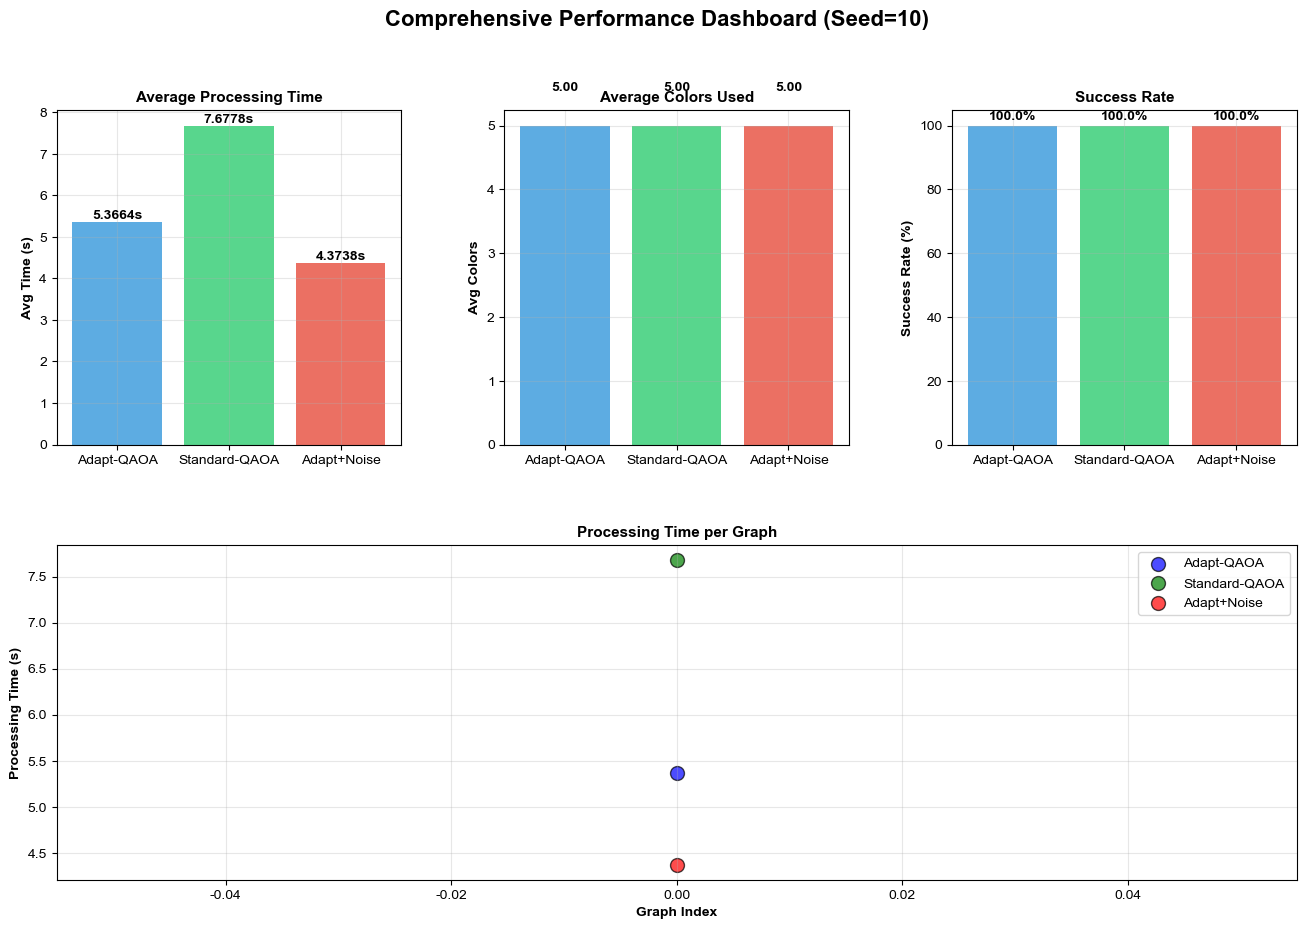

In [ ]:
# Plot 4: Comprehensive Performance Dashboard
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# 1. Average processing time
ax1 = fig.add_subplot(gs[0, 0])
avg_times = []
time_labels = []
if RUN_ADAPT:
    avg_adapt_time = np.mean([r['adapt_time'] for r in records if r['adapt_success']])
    avg_times.append(avg_adapt_time)
    time_labels.append('Adapt-QAOA')
if RUN_STANDARD:
    avg_std_time = np.mean([r['std_time'] for r in records if r['std_success']])
    avg_times.append(avg_std_time)
    time_labels.append('Standard-QAOA')
if RUN_ADAPT_NOISE:
    avg_noise_time = np.mean([r['adapt_time_noise'] for r in records if r['adapt_success_noise']])
    avg_times.append(avg_noise_time)
    time_labels.append('Adapt+Noise')

bars1 = ax1.bar(time_labels, avg_times, color=['#3498db', '#2ecc71', '#e74c3c'][:len(time_labels)], alpha=0.8)
for bar, val in zip(bars1, avg_times):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01, f'{val:.4f}s',
            ha='center', va='bottom', fontsize=10, fontweight='bold')
ax1.set_ylabel('Avg Time (s)', fontweight='bold')
ax1.set_title('Average Processing Time', fontweight='bold', fontsize=11)
ax1.grid(True, alpha=0.3)

# 2. Average colors used
ax2 = fig.add_subplot(gs[0, 1])
avg_colors = []
color_labels = []
if RUN_ADAPT:
    avg_adapt_colors = np.mean([r['adapt_colors'] for r in records if r['adapt_success']])
    avg_colors.append(avg_adapt_colors)
    color_labels.append('Adapt-QAOA')
if RUN_STANDARD:
    avg_std_colors = np.mean([r['std_colors'] for r in records if r['std_success']])
    avg_colors.append(avg_std_colors)
    color_labels.append('Standard-QAOA')
if RUN_ADAPT_NOISE:
    avg_noise_colors = np.mean([r['adapt_colors_noise'] for r in records if r['adapt_success_noise']])
    avg_colors.append(avg_noise_colors)
    color_labels.append('Adapt+Noise')

bars2 = ax2.bar(color_labels, avg_colors, color=['#3498db', '#2ecc71', '#e74c3c'][:len(color_labels)], alpha=0.8)
for bar, val in zip(bars2, avg_colors):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5, f'{val:.2f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')
ax2.set_ylabel('Avg Colors', fontweight='bold')
ax2.set_title('Average Colors Used', fontweight='bold', fontsize=11)
ax2.grid(True, alpha=0.3)

# 3. Success rate comparison
ax3 = fig.add_subplot(gs[0, 2])
success_rates = []
sr_labels = []
if RUN_ADAPT:
    adapt_sr = sum(1 for r in records if r['adapt_success']) / len(records) * 100
    success_rates.append(adapt_sr)
    sr_labels.append('Adapt-QAOA')
if RUN_STANDARD:
    std_sr = sum(1 for r in records if r['std_success']) / len(records) * 100
    success_rates.append(std_sr)
    sr_labels.append('Standard-QAOA')
if RUN_ADAPT_NOISE:
    noise_sr = sum(1 for r in records if r['adapt_success_noise']) / len(records) * 100
    success_rates.append(noise_sr)
    sr_labels.append('Adapt+Noise')

bars3 = ax3.bar(sr_labels, success_rates, color=['#3498db', '#2ecc71', '#e74c3c'][:len(sr_labels)], alpha=0.8)
for bar, val in zip(bars3, success_rates):
    ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1, f'{val:.1f}%',
            ha='center', va='bottom', fontsize=10, fontweight='bold')
ax3.set_ylabel('Success Rate (%)', fontweight='bold')
ax3.set_title('Success Rate', fontweight='bold', fontsize=11)
ax3.set_ylim(0, 105)
ax3.grid(True, alpha=0.3)

# 4. Processing time per graph (scatter)
ax4 = fig.add_subplot(gs[1, :])
for i, r in enumerate(records):
    if RUN_ADAPT and r['adapt_success']:
        ax4.scatter(i, r['adapt_time'], c='blue', s=100, alpha=0.7, label='Adapt-QAOA' if i == 0 else '', edgecolors='black', linewidths=1)
    if RUN_STANDARD and r['std_success']:
        ax4.scatter(i, r['std_time'], c='green', s=100, alpha=0.7, label='Standard-QAOA' if i == 0 else '', edgecolors='black', linewidths=1)
    if RUN_ADAPT_NOISE and r['adapt_success_noise']:
        ax4.scatter(i, r['adapt_time_noise'], c='red', s=100, alpha=0.7, label='Adapt+Noise' if i == 0 else '', edgecolors='black', linewidths=1)

ax4.set_xlabel('Graph Index', fontweight='bold')
ax4.set_ylabel('Processing Time (s)', fontweight='bold')
ax4.set_title('Processing Time per Graph', fontweight='bold', fontsize=11)
ax4.grid(True, alpha=0.3)
ax4.legend(loc='upper right')

plt.suptitle('Comprehensive Performance Dashboard (Seed={})'.format(SEED), fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
dashboard_path = os.path.join(viz_dir, f'seed{SEED}_performance_dashboard.pdf')
plt.savefig(dashboard_path, dpi=300, bbox_inches='tight')
print(f"✅ Performance dashboard saved: {dashboard_path}")
plt.show()
plt.close()